# Phase 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder

In [3]:
# Reads the CSV file into a DataFrame
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [4]:
# Displays concise information about the DataFrame 'df', including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Checking missing values.
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Statistic summary of dataframe.
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

# DATA CLEANING

Converting host_name to upper case

In [7]:
# Converts the 'host_name' column to uppercase
df["host_name"] = df["host_name"].str.upper()

# Displays the modified 'host_name' column
df["host_name"]


0                 JOHN
1             JENNIFER
2            ELISABETH
3          LISAROXANNE
4                LAURA
             ...      
48890          SABRINA
48891          MARISOL
48892    ILGAR & AYSEL
48893              TAZ
48894       CHRISTOPHE
Name: host_name, Length: 48895, dtype: object

Remove rows with missing 'name' and 'host_name'

In [8]:
# Drops rows with missing values in the 'name' and 'host_name' columns
df.dropna(subset=['name', 'host_name'], inplace=True)

# Displays the shape of the DataFrame after dropping rows
df.shape


(48858, 16)

Drop unnecessary columns like 'id', 'host_id'


In [9]:
# Drops the 'id' and 'host_id' columns from the DataFrame
df = df.drop(columns=['id', 'host_id'])

# Displays the shape of the DataFrame after dropping columns
df.shape


(48858, 14)

Rename column name to hotel_name

In [10]:
# Renames the 'name' column to 'hotel_name'
df.rename(columns={"name": "hotel_name"}, inplace=True)

# Displays the first row (header) of the DataFrame to confirm column names
df.head(0)


Empty DataFrame
Columns: [hotel_name, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

Fill missing values in 'last_review' with ffill and 'reviews_per_month' with column median

In [11]:
# Fills missing values in the 'last_review' column using forward fill method
df['last_review'].fillna(method='ffill', inplace=True)

# Fills missing values in the 'reviews_per_month' column with the median of the column
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

# Displays only the 'last_review' and 'reviews_per_month' columns
df[['last_review', 'reviews_per_month']]

last_review  reviews_per_month
0      2018-10-19               0.21
1      2019-05-21               0.38
2      2019-05-21               0.72
3      2019-07-05               4.64
4      2018-11-19               0.10
...           ...                ...
48890  2019-07-08               0.72
48891  2019-07-08               0.72
48892  2019-07-08               0.72
48893  2019-07-08               0.72
48894  2019-07-08               0.72

[48858 rows x 2 columns]

Convert 'last_review' column to datetime type

In [12]:
# Converts the 'last_review' column to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Displays the data types of each column in the DataFrame
df.dtypes


hotel_name                                object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

DataFrame column type conversion to categorical

In [13]:
# Converts the 'neighbourhood_group' and 'room_type' columns to categorical data type
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['room_type'] = df['room_type'].astype('category')

# Displays the data types of each column in the DataFrame
df.dtypes


hotel_name                                object
host_name                                 object
neighbourhood_group                     category
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

Removing special characters

In [14]:
# Defines the pattern to remove from the 'hotel_name' column
pattern = r'[\d_\.\'\"!/]'

# Removes the specified pattern from the 'hotel_name' column
df["hotel_name"] = df["hotel_name"].str.replace(pattern, '', regex=True)

# Displays the modified 'hotel_name' column
df["hotel_name"]


0                      Clean & quiet apt home by the park
1                                   Skylit Midtown Castle
2                          THE VILLAGE OF HARLEMNEW YORK 
3                         Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious StudioLoft by central park
                               ...                       
48890     Charming one bedroom - newly renovated rowhouse
48891        Affordable room in BushwickEast Williamsburg
48892             Sunny Studio at Historical Neighborhood
48893                   rd St Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hells Kitchen
Name: hotel_name, Length: 48858, dtype: object

Derive location using latitude and longitude

In [15]:
# Combines latitude and longitude into a new 'location' column
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)

# Drops the 'latitude' and 'longitude' columns from the DataFrame
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Displays the first 10 rows of the DataFrame
df.head(10)


hotel_name    host_name  \
0               Clean & quiet apt home by the park         JOHN   
1                            Skylit Midtown Castle     JENNIFER   
2                   THE VILLAGE OF HARLEMNEW YORK     ELISABETH   
3                  Cozy Entire Floor of Brownstone  LISAROXANNE   
4  Entire Apt: Spacious StudioLoft by central park        LAURA   
5         Large Cozy  BR Apartment In Midtown East        CHRIS   
6                                   BlissArtsSpace        GARON   
7                  Large Furnished Room Near Bway      SHUNICHI   
8               Cozy Clean Guest Room - Family Apt    MARYELLEN   
9                Cute & Cozy Lower East Side  bdrm          BEN   

  neighbourhood_group       neighbourhood        room_type  price  \
0            Brooklyn          Kensington     Private room    149   
1           Manhattan             Midtown  Entire home/apt    225   
2           Manhattan              Harlem     Private room    150   
3            Brooklyn        Clinton Hill  Entire home/apt     89   
4           Manhattan         East Harlem  Entire home/apt     80   
5           Manhattan         Murray Hill  Entire home/apt    200   
6            Brooklyn  Bedford-Stuyvesant     Private room     60   
7           Manhattan      Hell's Kitchen     Private room     79   
8           Manhattan     Upper West Side     Private room     79   
9           Manhattan           Chinatown  Entire home/apt    150   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   
1               1                 45  2019-05-21               0.38   
2               3                  0  2019-05-21               0.72   
3               1                270  2019-07-05               4.64   
4              10                  9  2018-11-19               0.10   
5               3                 74  2019-06-22               0.59   
6              45                 49  2017-10-05               0.40   
7               2                430  2019-06-24               3.47   
8               2                118  2017-07-21               0.99   
9               1                160  2019-06-09               1.33   

   calculated_host_listings_count  availability_365            location  
0                               6               365  40.64749,-73.97237  
1                               2               355  40.75362,-73.98377  
2                               1               365   40.80902,-73.9419  
3                               1               194  40.68514,-73.95976  
4                               1                 0  40.79851,-73.94399  
5                               1               129    40.74767,-73.975  
6                               1                 0  40.68688,-73.95596  
7                               1               220  40.76489,-73.98493  
8                               1                 0  40.80178,-73.96723  
9                               4               188  40.71344,-73.99037

Normalize availability 365

In [16]:
# Normalizes the 'availability_365' column to the range [0, 1]
df['availability_365'] = (df['availability_365'] - df['availability_365'].min()) / (df['availability_365'].max() - df['availability_365'].min())

# Displays the normalized 'availability_365' column
df['availability_365']


0        1.000000
1        0.972603
2        1.000000
3        0.531507
4        0.000000
           ...   
48890    0.024658
48891    0.098630
48892    0.073973
48893    0.005479
48894    0.063014
Name: availability_365, Length: 48858, dtype: float64

Remove outliners from minimum_nights column

In [17]:
# Computes the 99th percentile of the 'minimum_nights' column
p99 = df['minimum_nights'].quantile(0.99)

# Filters the DataFrame to include only rows where 'minimum_nights' is less than or equal to the 99th percentile
df = df[df['minimum_nights'] <= p99]

# Prints the shape of the filtered DataFrame
print(df.shape)


(48390, 13)


Label encoding for 'neighbourhood' column

In [18]:
# Instantiates a LabelEncoder object
label_encoder = LabelEncoder()

# Encodes the 'neighbourhood', 'neighbourhood_group', and 'room_type' columns using LabelEncoder
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

# Displays only the 'neighbourhood', 'neighbourhood_group', and 'room_type' columns
df[['neighbourhood', 'neighbourhood_group', 'room_type']]

neighbourhood  neighbourhood_group  room_type
0                108                    1          1
1                127                    2          0
2                 94                    2          1
3                 41                    1          0
4                 61                    2          0
...              ...                  ...        ...
48890             13                    1          1
48891             28                    1          1
48892             94                    2          0
48893             95                    2          2
48894             95                    2          1

[48390 rows x 3 columns]

# EDA

In [19]:
#Checking missing values.
df.isna().sum()

hotel_name                        0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
location                          0
dtype: int64

In [20]:
#Descriptive statistics for numerical columns.
df.describe()

neighbourhood_group  neighbourhood     room_type         price  \
count         48390.000000   48390.000000  48390.000000  48390.000000   
mean              1.675491     107.088903      0.505125    151.607150   
min               0.000000       0.000000      0.000000      0.000000   
25%               1.000000      51.000000      0.000000     69.000000   
50%               2.000000      94.000000      0.000000    106.000000   
75%               2.000000     178.000000      1.000000    175.000000   
max               4.000000     220.000000      2.000000  10000.000000   
std               0.736661      68.742132      0.545331    226.773155   

       minimum_nights  number_of_reviews                    last_review  \
count    48390.000000       48390.000000                          48390   
mean         5.742054          23.408700  2018-10-15 10:54:42.628642048   
min          1.000000           0.000000            2011-03-28 00:00:00   
25%          1.000000           1.000000            2018-08-03 00:00:00   
50%          2.000000           5.000000            2019-05-25 00:00:00   
75%          5.000000          24.000000            2019-06-24 00:00:00   
max         45.000000         629.000000            2019-07-08 00:00:00   
std          8.458258          44.661263                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       48390.000000                    48390.000000      48390.000000  
mean            1.245565                        7.142261          0.307297  
min             0.010000                        1.000000          0.000000  
25%             0.280000                        1.000000          0.000000  
50%             0.720000                        1.000000          0.120548  
75%             1.610000                        2.000000          0.616438  
max            58.500000                      327.000000          1.000000  
std             1.526029                       32.976673          0.359854

In [21]:
#A concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48390 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel_name                      48390 non-null  object        
 1   host_name                       48390 non-null  object        
 2   neighbourhood_group             48390 non-null  int64         
 3   neighbourhood                   48390 non-null  int64         
 4   room_type                       48390 non-null  int64         
 5   price                           48390 non-null  int64         
 6   minimum_nights                  48390 non-null  int64         
 7   number_of_reviews               48390 non-null  int64         
 8   last_review                     48390 non-null  datetime64[ns]
 9   reviews_per_month               48390 non-null  float64       
 10  calculated_host_listings_count  48390 non-null  int64         
 11  availab

The distribution of 'minimum_nights' with overlaid mean and median lines.

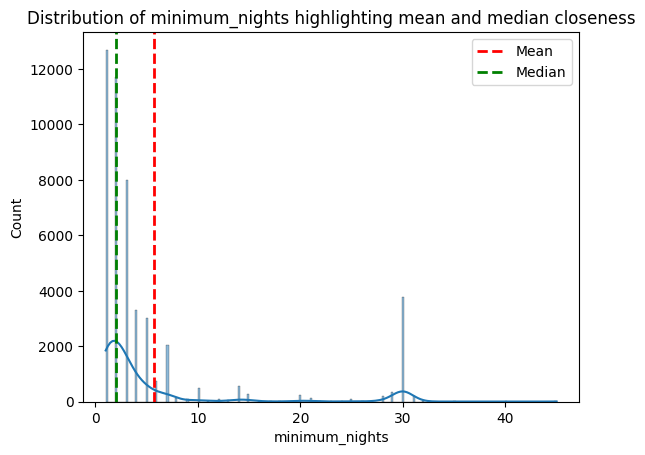

In [22]:
# Visualizes the distribution of 'minimum_nights' with a histogram, including KDE
sns.histplot(df['minimum_nights'], kde=True)

# Adds a vertical line representing the mean of 'minimum_nights' with a red dashed line
plt.axvline(df['minimum_nights'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# Adds a vertical line representing the median of 'minimum_nights' with a green dashed line
plt.axvline(df['minimum_nights'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

# Adds a legend to the plot
plt.legend()

# Sets the title of the plot
plt.title("Distribution of minimum_nights highlighting mean and median closeness")

# Displays the plot
plt.show()


Geographical distribution of listings with respect to latitude and longitude, colored by neighbourhood groups.

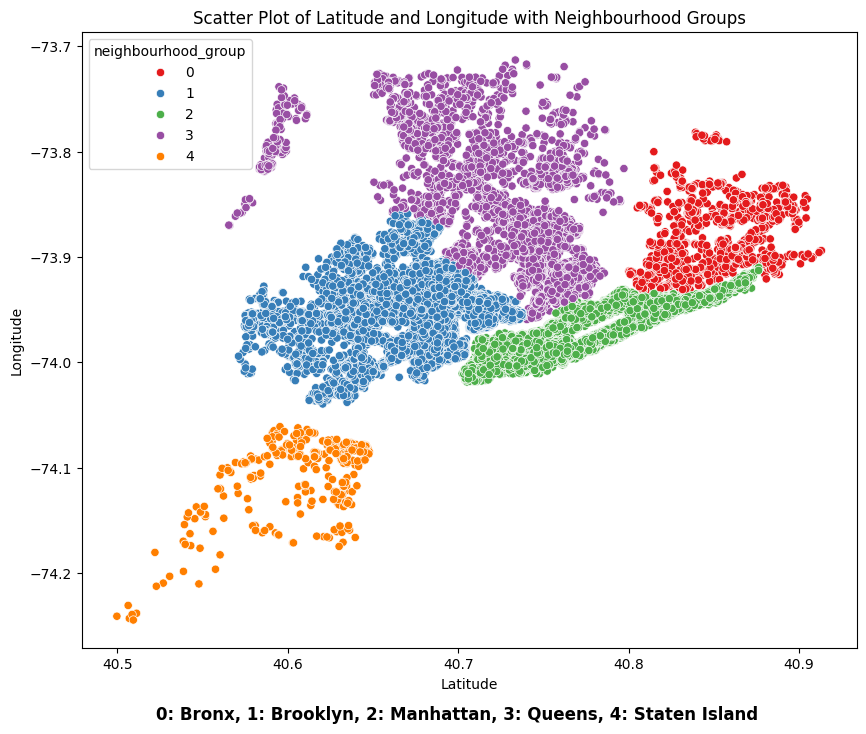

In [23]:
# Splits the 'location' column into latitude and longitude, converts to float, and assigns to new columns
df[['latitude', 'longitude']] = df['location'].str.split(',', expand=True).astype(float)

# Sets the size of the plot
plt.figure(figsize=(10, 8))

# Creates a scatter plot of latitude and longitude colored by neighbourhood group using the 'Set1' palette
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=df, palette='Set1')

# Sets the title and labels for the plot
plt.title('Scatter Plot of Latitude and Longitude with Neighbourhood Groups')
subtitle_text = "\n0: Bronx, 1: Brooklyn, 2: Manhattan, 3: Queens, 4: Staten Island"
plt.gcf().text(0.5, 0.02, subtitle_text, ha='center', fontsize=12, color='black', fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Longitude')


# Displays the plot
plt.show()


Relationship between neighbourhood groups and prices of listings.

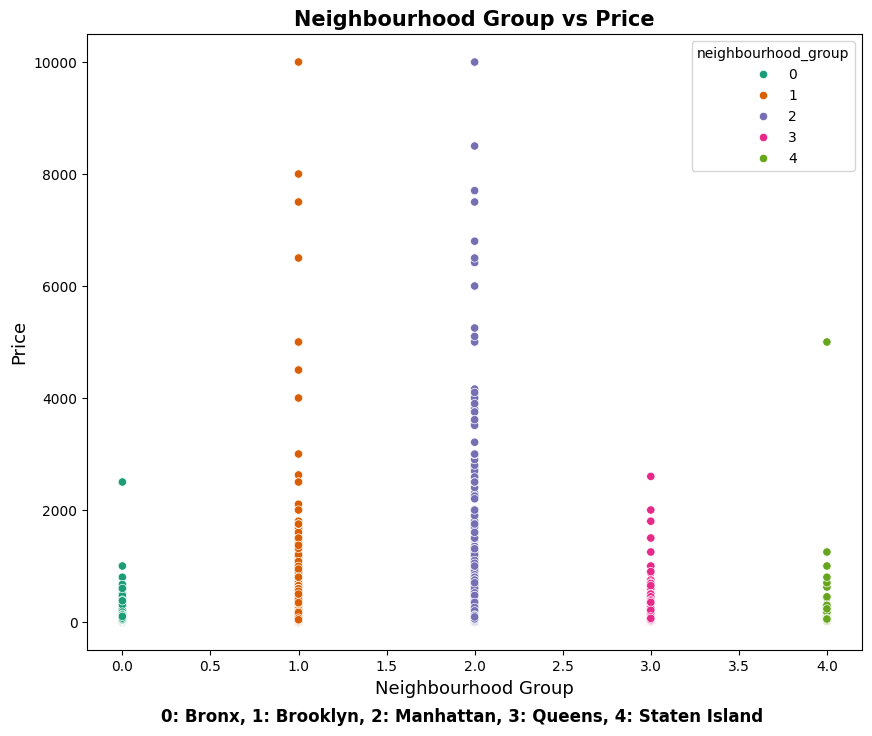

In [24]:
# Sets the size of the plot
plt.figure(figsize=(10, 8))

# Creates a scatter plot of neighbourhood group against price, colored by neighbourhood group
sns.scatterplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette="Dark2")

subtitle_text = "\n0: Bronx, 1: Brooklyn, 2: Manhattan, 3: Queens, 4: Staten Island"
plt.gcf().text(0.5, 0.02, subtitle_text, ha='center', fontsize=12, color='black', fontweight='bold')

# Sets labels and title for the plot
plt.xlabel("Neighbourhood Group", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood Group vs Price", size=15, weight='bold')

# Displays the plot
plt.show()


The distribution of listings across different neighbourhood groups using a pie chart.

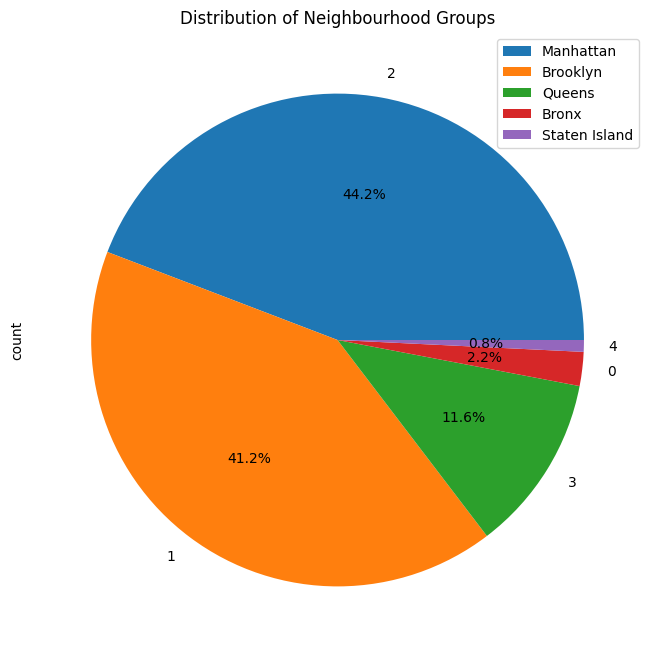

In [25]:
# Sets the size of the plot
plt.figure(figsize=(8, 8))

# Computes the count of listings in each neighbourhood group
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()

# Defines names for neighbourhood groups
neighbourhood_group_names = {
    0: 'Bronx',
    1: 'Brooklyn',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Staten Island'
}

# Creates a pie chart representing the distribution of listings across neighbourhood groups
neighbourhood_group_counts.plot(kind='pie', autopct='%1.1f%%')

# Sets the title of the plot
plt.title('Distribution of Neighbourhood Groups')

# Removes y-axis label
#plt.ylabel('')

# Removes numerical labels by setting the xticks to an empty list
#plt.xticks([])

# Adds a legend with neighbourhood group labels
plt.legend(labels=[neighbourhood_group_names[i] for i in neighbourhood_group_counts.index])

# Displays the plot
plt.show()


The probability plot of the logarithmically transformed prices.

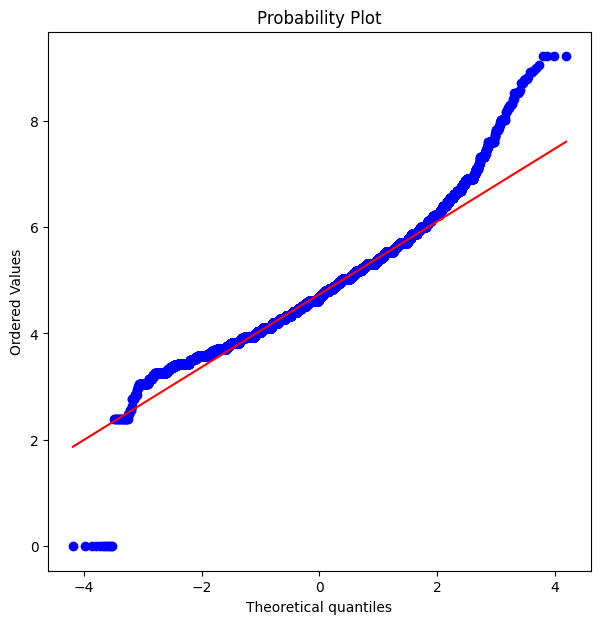

In [26]:
# Sets the size of the plot
plt.figure(figsize=(7,7))

# Generates a probability plot of the logarithmically transformed prices
stats.probplot(np.log(df.price+1), plot=plt)

# Displays the plot
plt.show()


Comparing the distribution of prices and log-transformed prices.

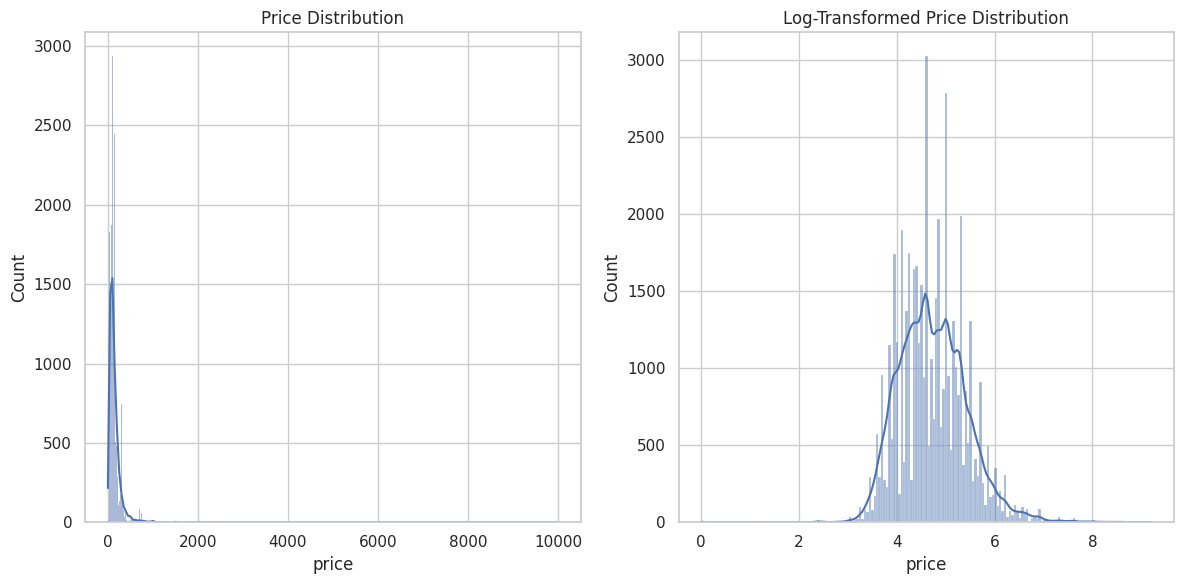

In [27]:
# Sets the style to whitegrid
sns.set(style="whitegrid")

# Sets the size of the figure
plt.figure(figsize=(12, 6))

# Creates subplots with 1 row and 2 columns, and selects the first subplot
plt.subplot(1, 2, 1)

# Creates a histogram of 'price' with KDE
sns.histplot(df['price'], kde=True)

# Sets the title for the first subplot
plt.title('Price Distribution')

# Selects the second subplot
plt.subplot(1, 2, 2)

# Creates a histogram of the log-transformed 'price' with KDE
sns.histplot(np.log(df['price'] + 1), kde=True)

# Sets the title for the second subplot
plt.title('Log-Transformed Price Distribution')

# Adjusts the layout of subplots
plt.tight_layout()

# Displays the plot
plt.show()


The relationship between neighbourhood groups and price, as well as the count of listings per neighbourhood group.

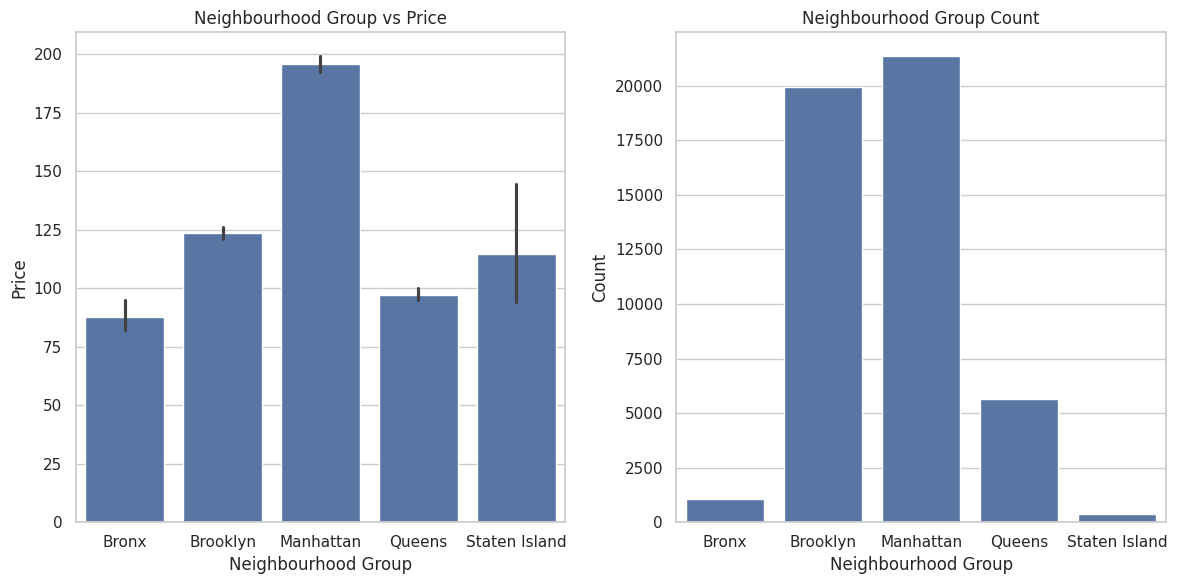

In [28]:
# Define names for neighbourhood groups
neighbourhood_group_names = {
    0: 'Bronx',
    1: 'Brooklyn',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Staten Island'
}

# Sets the size of the figure
plt.figure(figsize=(12, 6))

# Creates the first subplot for average price
plt.subplot(1, 2, 1)

# Creates a bar plot of 'neighbourhood_group' against 'price'
sns.barplot(x='neighbourhood_group', y='price', data=df)

# Sets the title and labels for the first subplot
plt.title('Neighbourhood Group vs Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')  # Add y-axis label
plt.xticks(ticks=range(5), labels=[neighbourhood_group_names[i] for i in range(5)])  # Replace numerical labels with names

# Creates the second subplot for count of listings
plt.subplot(1, 2, 2)

# Creates a count plot of 'neighbourhood_group'
sns.countplot(x='neighbourhood_group', data=df)

# Sets the title and labels for the second subplot
plt.title('Neighbourhood Group Count')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')  # Add y-axis label
plt.xticks(ticks=range(5), labels=[neighbourhood_group_names[i] for i in range(5)])  # Replace numerical labels with names

# Adjusts the layout of subplots
plt.tight_layout()

# Displays the plot
plt.show()


The trend of the number of reviews over time

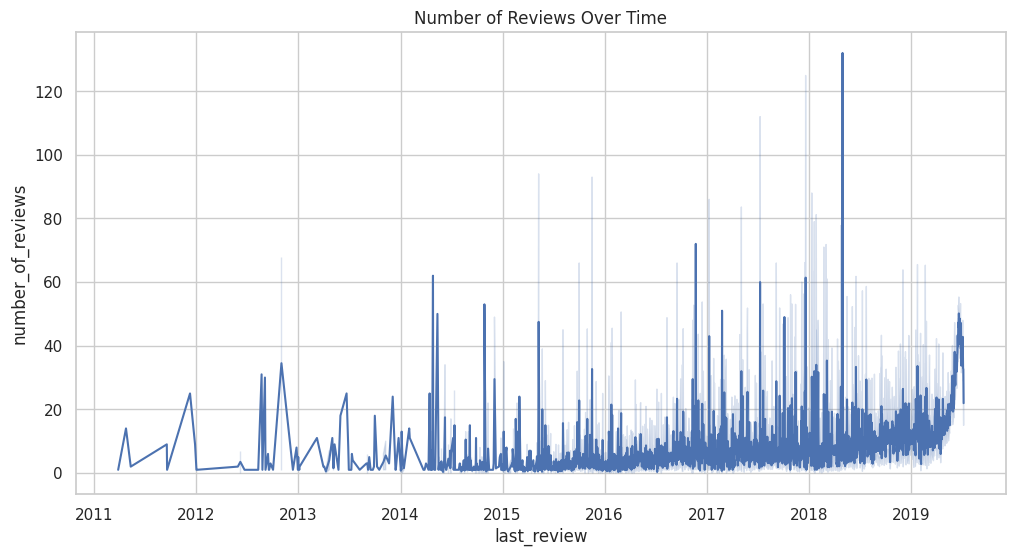

In [29]:
# Sets the size of the figure
plt.figure(figsize=(12, 6))

# Creates a line plot of 'number_of_reviews' over time ('last_review')
sns.lineplot(x='last_review', y='number_of_reviews', data=df)

# Sets the title of the plot
plt.title('Number of Reviews Over Time')

# Displays the plot
plt.show()


The distribution of the 'minimum_nights' variable using a box plot.

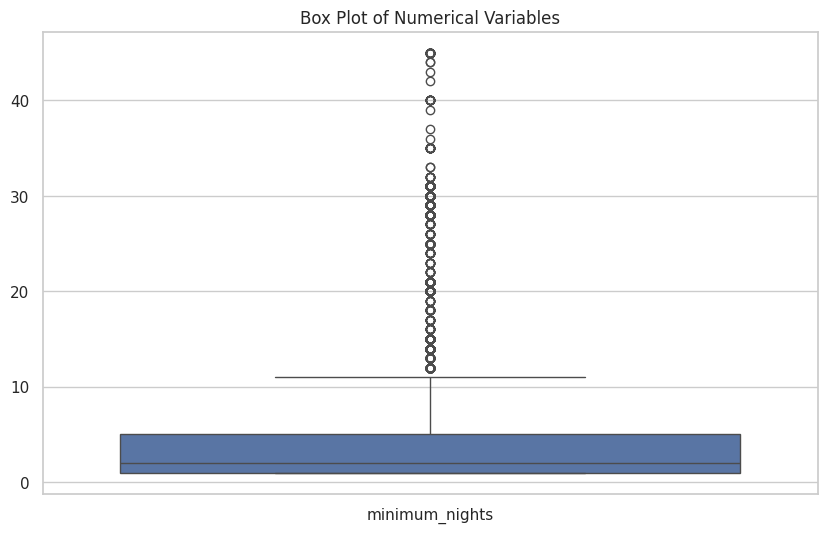

In [30]:
# Sets the size of the figure
plt.figure(figsize=(10, 6))

# Creates a box plot of the 'minimum_nights' variable
sns.boxplot(data=df[['minimum_nights']])

# Sets the title of the plot
plt.title('Box Plot of Numerical Variables')

# Displays the plot
plt.show()


Pairwise relationships between selected numerical variables.

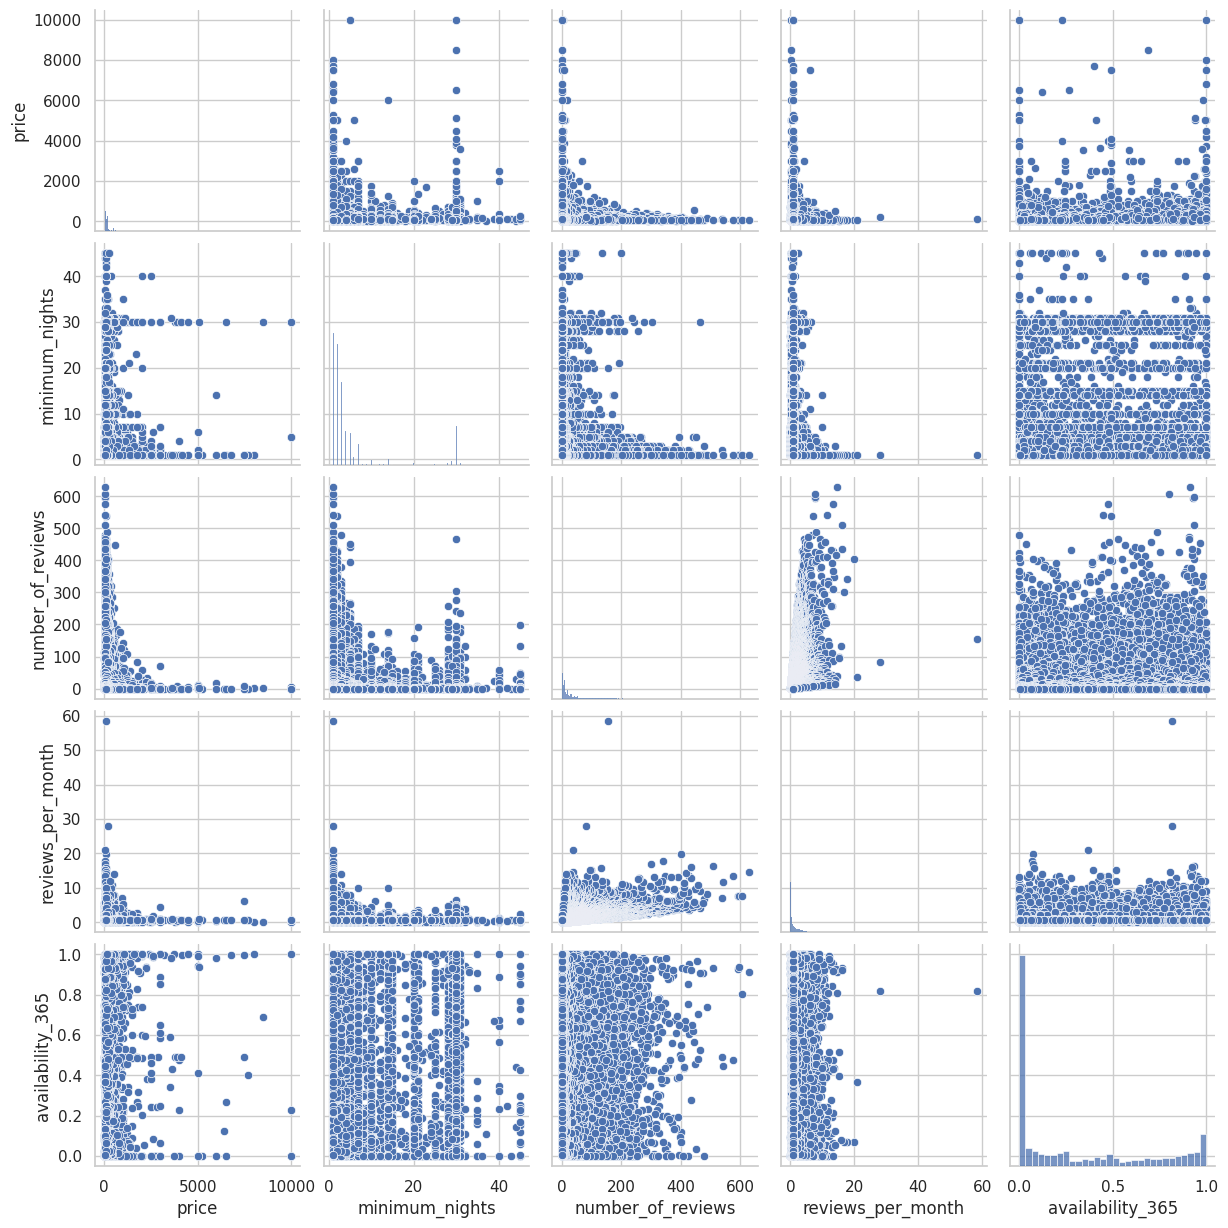

In [31]:
# Creates a pairwise plot of selected numerical variables
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']])

# Displays the plot
plt.show()


The distribution of prices across different room types using a violin plot.

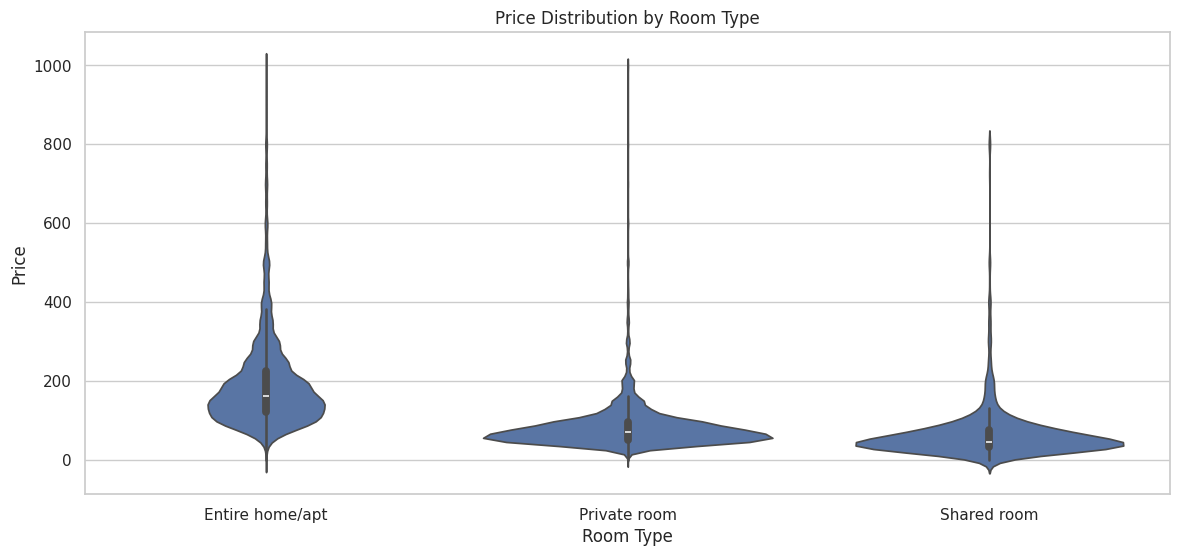

In [32]:
# Sets the size of the figure
plt.figure(figsize=(14, 6))

# Defines names for room types
room_type_names = {
    0: 'Entire home/apt',
    1: 'Private room',
    2: 'Shared room'
}

# Filters the DataFrame for prices below 1000
filtered_df = df[df.price < 1000]

# Creates a violin plot of price distribution by room type
sns.violinplot(x='room_type', y='price', data=filtered_df)

# Sets the x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2], labels=[room_type_names[i] for i in range(3)])

# Sets the title, xlabel, and ylabel for the plot
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Displays the plot
plt.show()


A map displaying the distribution of listings based on latitude and longitude.

In [33]:
# Splits the 'location' column into latitude and longitude, converts to float, and assigns to new columns
df[['latitude', 'longitude']] = df['location'].str.split(',', expand=True).astype(float)

# Computes the mean latitude and longitude to center the map
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# Creates a map centered at the mean latitude and longitude with zoom level 9
map1 = folium.Map(location=[center_lat, center_lon], zoom_start=9)

# Combines latitude and longitude into a list of tuples
locations = list(zip(df['latitude'], df['longitude']))

# Adds a marker cluster to the map using the locations data
FastMarkerCluster(data=locations).add_to(map1)

# Displays the map
map1


The average daily price for rooms across different neighbourhood groups and room types.

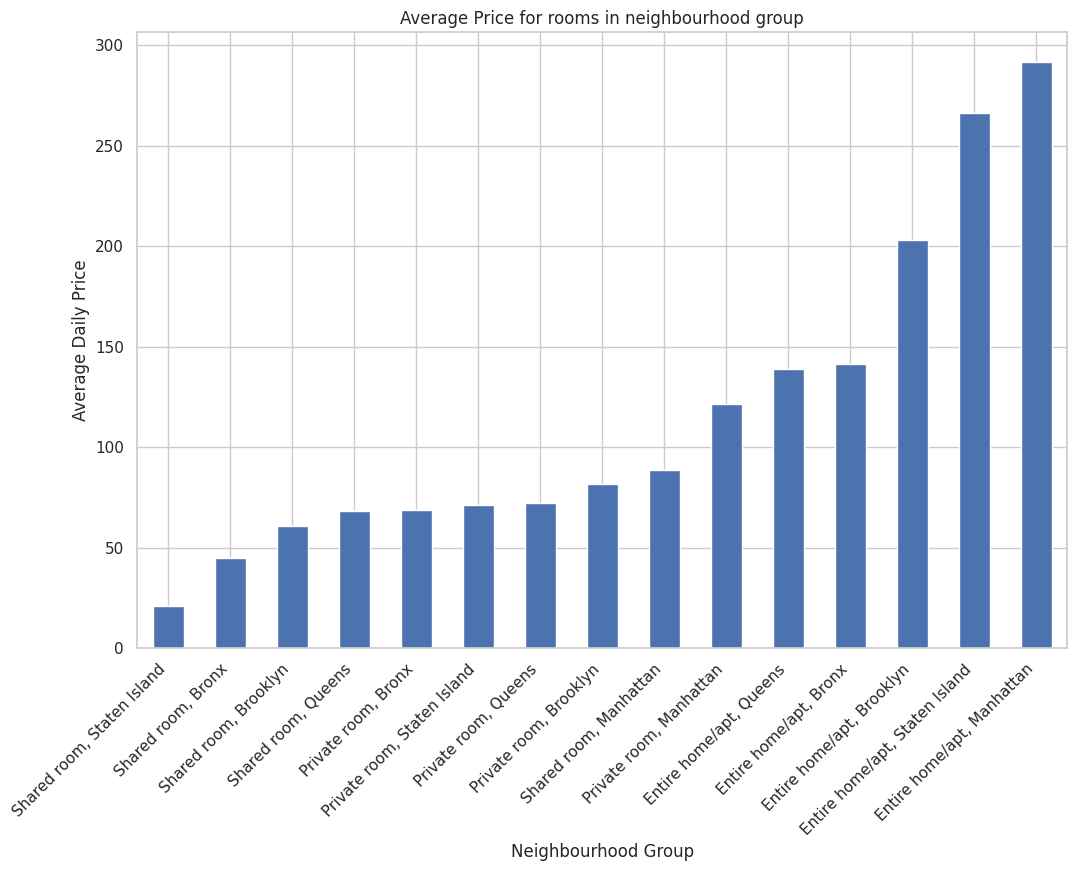

In [34]:
# Sets the size of the figure
plt.figure(figsize=(12, 8))

# Filters the DataFrame for listings with minimum nights equal to 1
df1 = df[df['minimum_nights'] == 1]

# Groups the filtered DataFrame by room type and neighbourhood group, computes the mean price, and sorts the values
df2 = df1.groupby(['room_type', 'neighbourhood_group'])['price'].mean().sort_values(ascending=True)

# Defines names for room types and neighbourhood groups
room_type_names = {
    0: 'Entire home/apt',
    1: 'Private room',
    2: 'Shared room'
}
neighbourhood_group_names = {
    0: 'Bronx',
    1: 'Brooklyn',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Staten Island'
}

# Creates a bar plot of the average price for rooms in each neighbourhood group
df2.plot(kind='bar')

# Sets the x-axis ticks and labels using a list comprehension to combine room type and neighbourhood group names
plt.xticks(ticks=range(len(df2)), labels=[f'{room_type_names[i[0]]}, {neighbourhood_group_names[i[1]]}' for i in df2.index], rotation=45, ha='right')

# Sets the title, ylabel, and xlabel for the plot
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')

# Displays the plot
plt.show()


A heatmap illustrating the correlation matrix among numerical variables.

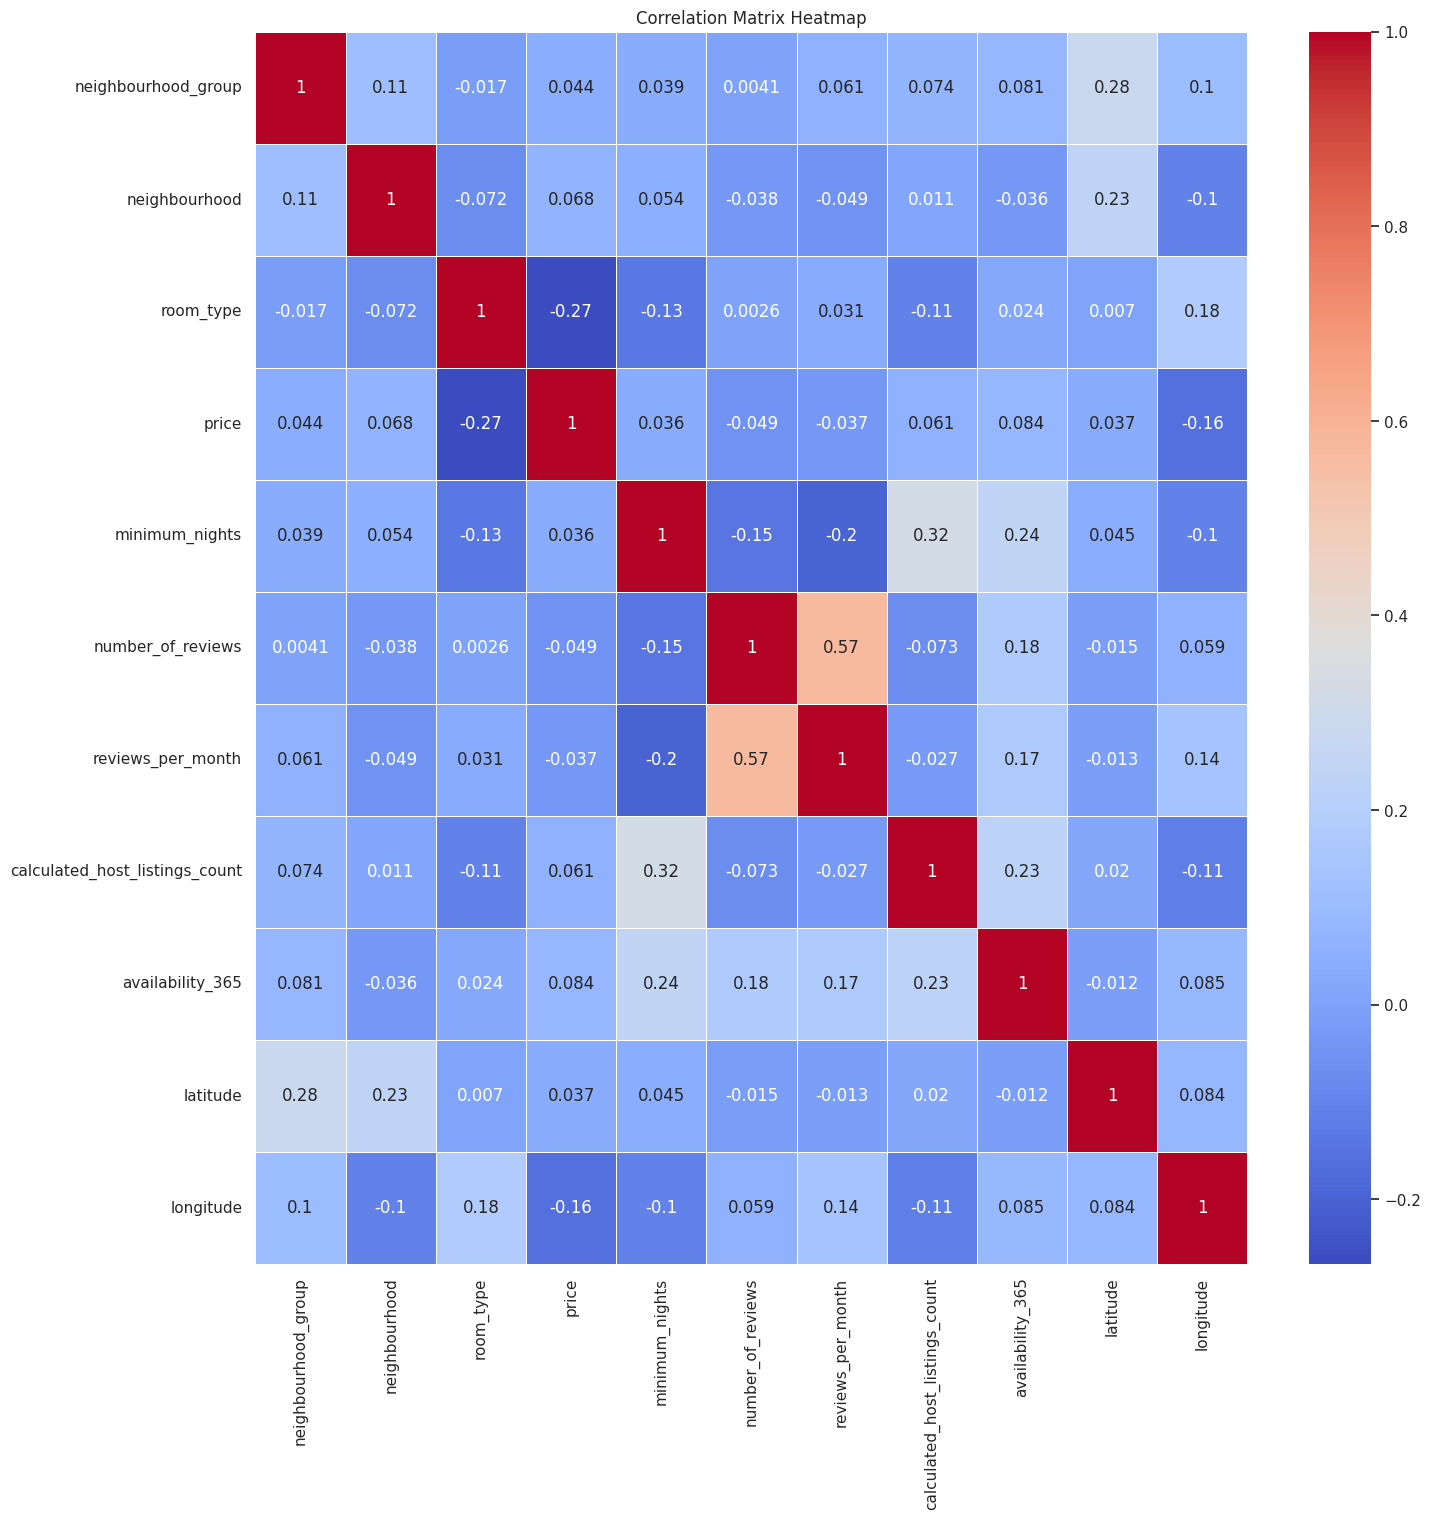

In [35]:
# Selects numerical columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Sets the size of the figure
plt.figure(figsize=(16, 16))

# Creates a heatmap of the correlation matrix of numerical variables
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Sets the title of the plot
plt.title('Correlation Matrix Heatmap')

# Displays the plot
plt.show()


The correlation matrix heatmap after removing the most correlated 'reviews_per_month' variable.

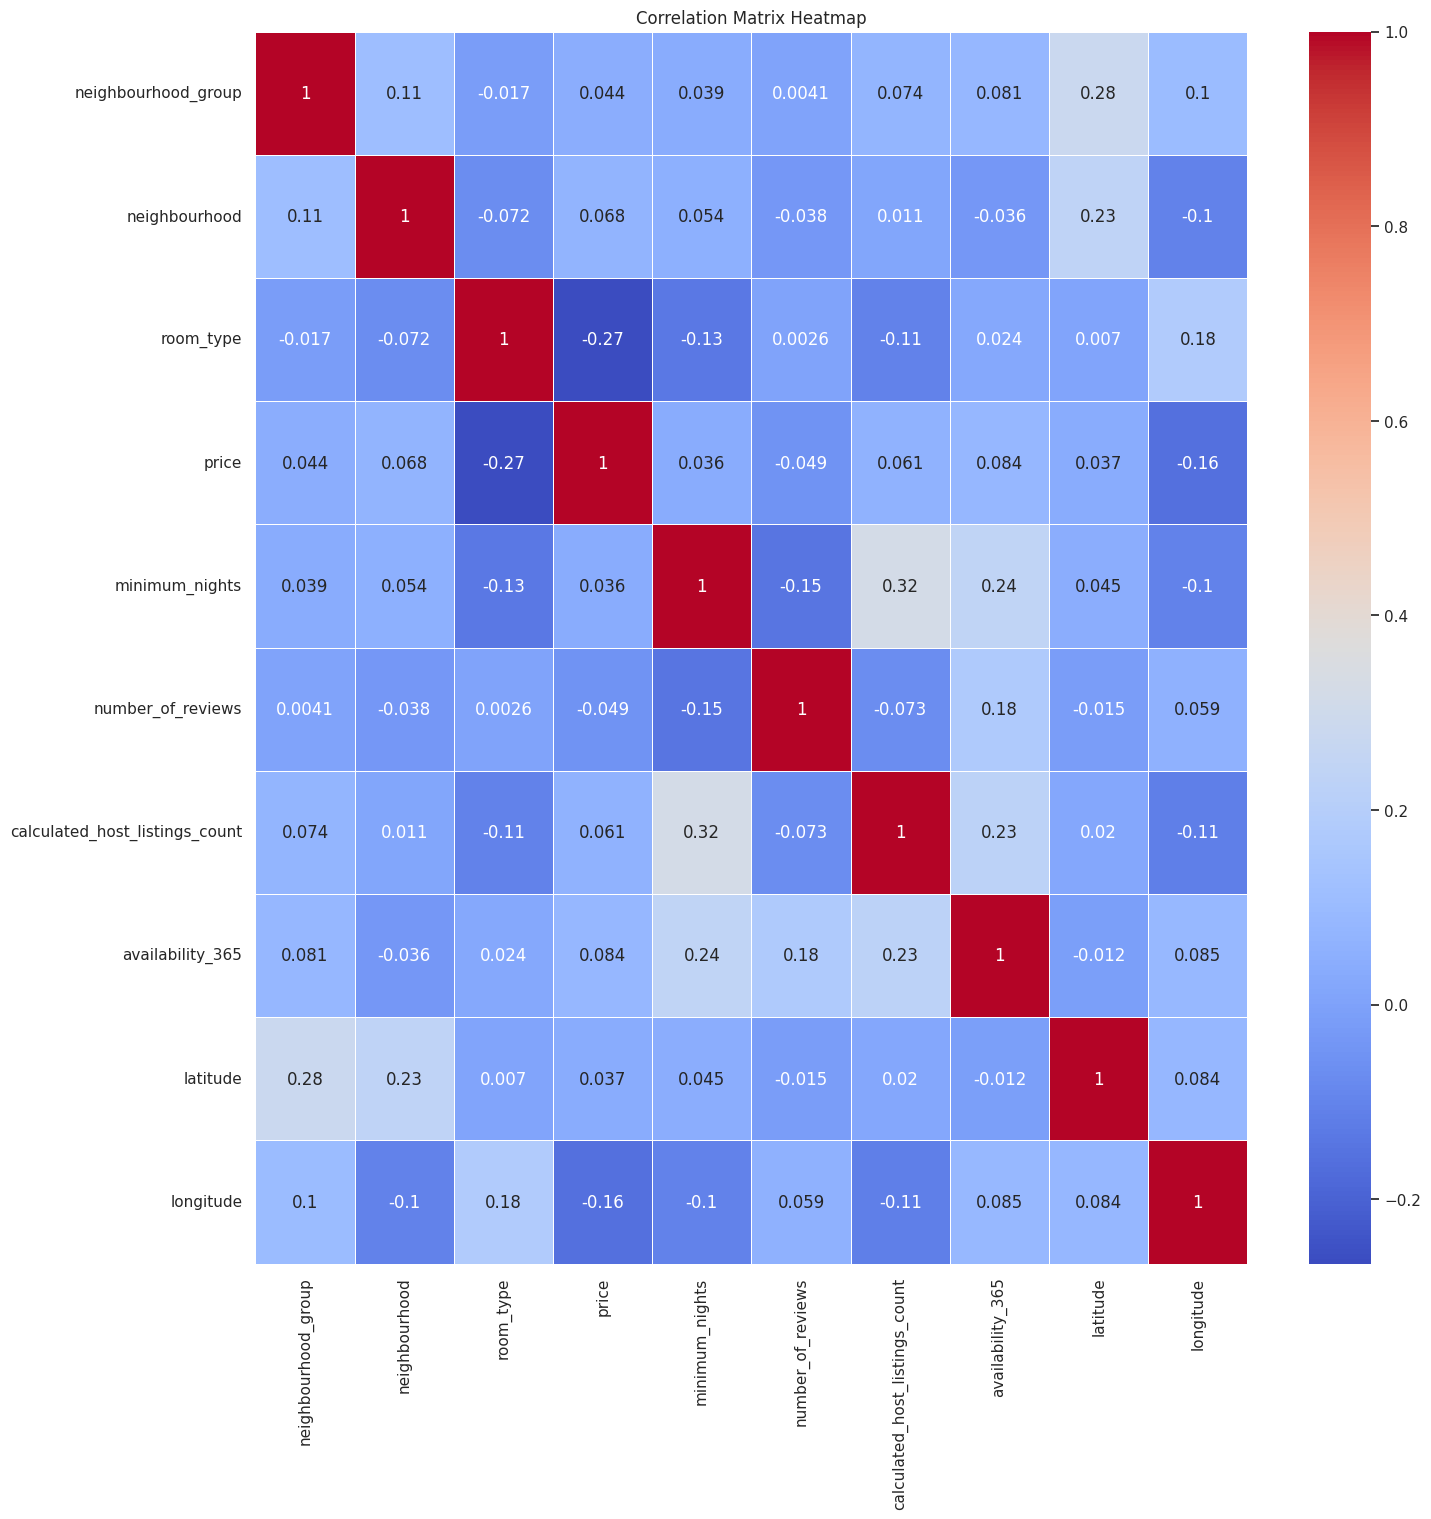

In [36]:
# Removes the 'reviews_per_month' column from the DataFrame
df = df.drop("reviews_per_month", axis=1)

# Selects numerical columns from the modified DataFrame
numeric_df = df.select_dtypes(include='number')

# Sets the size of the figure
plt.figure(figsize=(16, 16))

# Creates a heatmap of the correlation matrix of numerical variables
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Sets the title of the plot
plt.title('Correlation Matrix Heatmap')

# Displays the plot
plt.show()


# Phase 2

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn import tree
from tqdm import tqdm

In [38]:
df

hotel_name      host_name  \
0                    Clean & quiet apt home by the park           JOHN   
1                                 Skylit Midtown Castle       JENNIFER   
2                        THE VILLAGE OF HARLEMNEW YORK       ELISABETH   
3                       Cozy Entire Floor of Brownstone    LISAROXANNE   
4       Entire Apt: Spacious StudioLoft by central park          LAURA   
...                                                 ...            ...   
48890   Charming one bedroom - newly renovated rowhouse        SABRINA   
48891      Affordable room in BushwickEast Williamsburg        MARISOL   
48892           Sunny Studio at Historical Neighborhood  ILGAR & AYSEL   
48893                 rd St Time Square-cozy single bed            TAZ   
48894  Trendy duplex in the very heart of Hells Kitchen     CHRISTOPHE   

       neighbourhood_group  neighbourhood  room_type  price  minimum_nights  \
0                        1            108          1    149               1   
1                        2            127          0    225               1   
2                        2             94          1    150               3   
3                        1             41          0     89               1   
4                        2             61          0     80              10   
...                    ...            ...        ...    ...             ...   
48890                    1             13          1     70               2   
48891                    1             28          1     40               4   
48892                    2             94          0    115              10   
48893                    2             95          2     55               1   
48894                    2             95          1     90               7   

       number_of_reviews last_review  calculated_host_listings_count  \
0                      9  2018-10-19                               6   
1                     45  2019-05-21                               2   
2                      0  2019-05-21                               1   
3                    270  2019-07-05                               1   
4                      9  2018-11-19                               1   
...                  ...         ...                             ...   
48890                  0  2019-07-08                               2   
48891                  0  2019-07-08                               2   
48892                  0  2019-07-08                               1   
48893                  0  2019-07-08                               6   
48894                  0  2019-07-08                               1   

       availability_365            location  latitude  longitude  
0              1.000000  40.64749,-73.97237  40.64749  -73.97237  
1              0.972603  40.75362,-73.98377  40.75362  -73.98377  
2              1.000000   40.80902,-73.9419  40.80902  -73.94190  
3              0.531507  40.68514,-73.95976  40.68514  -73.95976  
4              0.000000  40.79851,-73.94399  40.79851  -73.94399  
...                 ...                 ...       ...        ...  
48890          0.024658  40.67853,-73.94995  40.67853  -73.94995  
48891          0.098630  40.70184,-73.93317  40.70184  -73.93317  
48892          0.073973  40.81475,-73.94867  40.81475  -73.94867  
48893          0.005479  40.75751,-73.99112  40.75751  -73.99112  
48894          0.063014  40.76404,-73.98933  40.76404  -73.98933  

[48390 rows x 14 columns]

In [39]:
df.to_csv('phase3_data.csv', index=False)

In [40]:
# Selects numerical columns from the DataFrame
numeric_df = df.select_dtypes(include='number')
numeric_df.head(10)

neighbourhood_group  neighbourhood  room_type  price  minimum_nights  \
0                    1            108          1    149               1   
1                    2            127          0    225               1   
2                    2             94          1    150               3   
3                    1             41          0     89               1   
4                    2             61          0     80              10   
5                    2            137          0    200               3   
6                    1             13          1     60              45   
7                    2             95          1     79               2   
8                    2            202          1     79               2   
9                    2             35          0    150               1   

   number_of_reviews  calculated_host_listings_count  availability_365  \
0                  9                               6          1.000000   
1                 45                               2          0.972603   
2                  0                               1          1.000000   
3                270                               1          0.531507   
4                  9                               1          0.000000   
5                 74                               1          0.353425   
6                 49                               1          0.000000   
7                430                               1          0.602740   
8                118                               1          0.000000   
9                160                               4          0.515068   

   latitude  longitude  
0  40.64749  -73.97237  
1  40.75362  -73.98377  
2  40.80902  -73.94190  
3  40.68514  -73.95976  
4  40.79851  -73.94399  
5  40.74767  -73.97500  
6  40.68688  -73.95596  
7  40.76489  -73.98493  
8  40.80178  -73.96723  
9  40.71344  -73.99037

In [41]:
df.to_csv('phase3_data_numeric.csv', index=False)

In [ ]:
# Assuming 'numeric_df' contains only numeric features and target variable
X = numeric_df.drop(columns=['price'])  # Assuming 'price' is the target variable
y = numeric_df['price']
y = np.log10(y+1)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R2 score
r2 = r2_score(y_test, y_pred)

# Calculating mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Printing the results
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.4690130774261352
Mean Squared Error (MSE): 0.048077960320012714
Root Mean Squared Error (RMSE): 0.21926687009216125


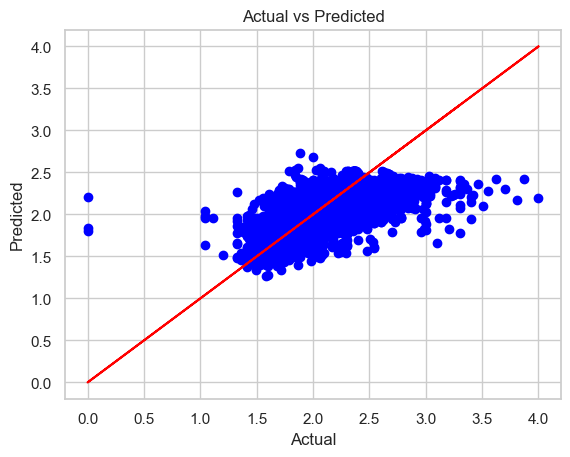

In [ ]:
# Scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the line y_test vs y_pred
plt.plot(y_test, y_test, color='red', label='Y_test vs Y_pred')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


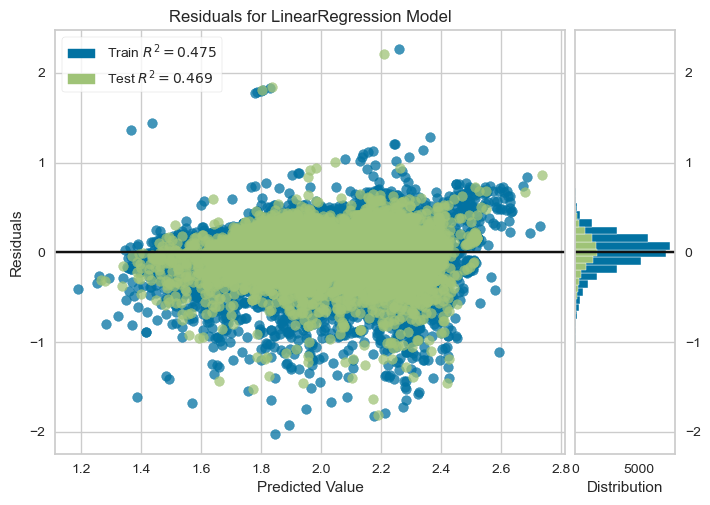

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(model)
vis.fit(X_train, y_train)
vis.score(X_test, y_test)
plt.title('Plot comparing the residuals vs predicted values')
vis.show()

SVM

In [ ]:
# Define different kernel types
kernels = ['poly', 'rbf']

# Initialize dictionaries to store MSE and R2 scores for each kernel
mse_scores = {}
r2_scores = {}

# Iterate over each kernel type with tqdm
for kernel in tqdm(kernels, desc="Kernel Progress"):
    # Training the SVR model
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svr.predict(X_test)

    # Calculating mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[kernel] = mse

    # Calculating R2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores[kernel] = r2

# Print MSE and R2 scores for each kernel
for kernel, mse in mse_scores.items():
    print(f"MSE for {kernel} kernel:", mse)

for kernel, r2 in r2_scores.items():
    print(f"R2 Score for {kernel} kernel:", r2)


Kernel Progress: 100%|██████████| 2/2 [04:02<00:00, 121.48s/it]

MSE for poly kernel: 0.06302164240269961
MSE for rbf kernel: 0.05656120540074466
R2 Score for poly kernel: 0.30397072312922935
R2 Score for rbf kernel: 0.37532166104999753


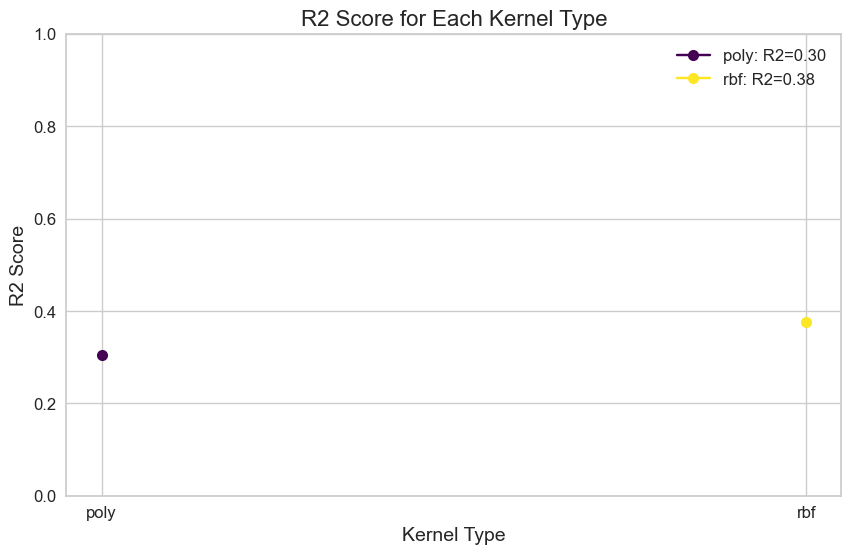

In [ ]:
# Extracting kernel names and R2 scores
kernels = list(r2_scores.keys())
r2_values = list(r2_scores.values())

# Define colors based on R2 scores
colors = [plt.cm.viridis(score) for score in np.linspace(0, 1, len(r2_values))]

# Creating a line plot with colorful markers
plt.figure(figsize=(10, 6))
for kernel, r2, color in zip(kernels, r2_values, colors):
    plt.plot(kernel, r2, marker='o', color=color, markersize=8, label=f'{kernel}: R2={r2:.2f}')

# Adding labels and title
plt.xlabel('Kernel Type', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.title('R2 Score for Each Kernel Type', fontsize=16)
plt.ylim(0, 1)  # Limiting y-axis to [0, 1] for R2 score
plt.xticks(kernels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


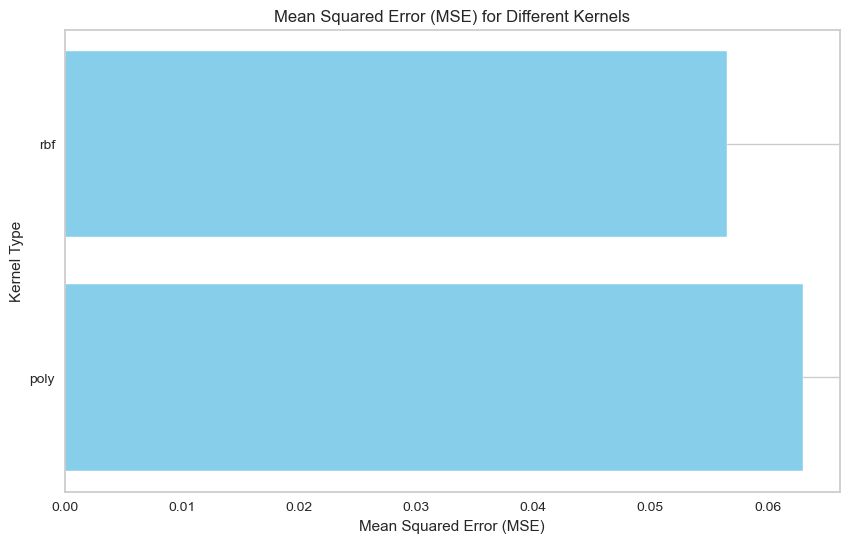

In [ ]:
import matplotlib.pyplot as plt

# Extract MSE scores for each kernel
mse_values = list(mse_scores.values())
kernels = list(mse_scores.keys())

# Extract mean MSE scores for each kernel
mean_mse_values = [np.mean(scores) for scores in mse_values]

# Plot horizontal bar plot for mean MSE scores
plt.figure(figsize=(10, 6))
plt.barh(kernels, mean_mse_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Kernel Type')
plt.title('Mean Squared Error (MSE) for Different Kernels')
plt.grid(axis='x')
plt.show()


K-Means

In [ ]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_df)

# Calculating Within-Cluster Sum of Squares (WCSS) for different values of K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)

C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'WCSS')

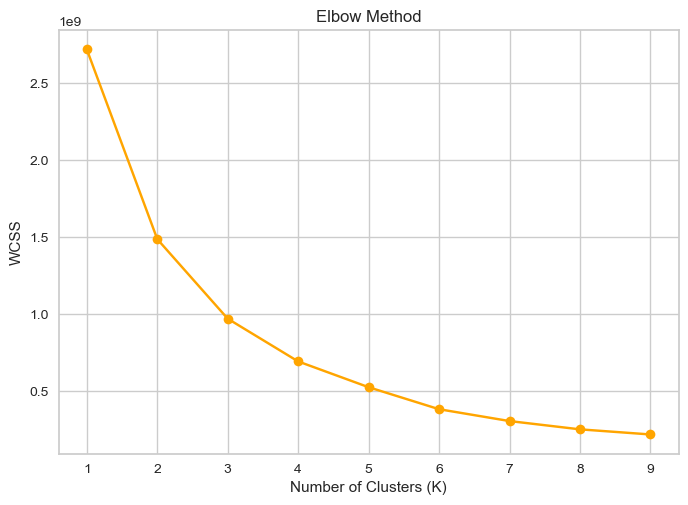

In [ ]:
# Plotting the WCSS against number of clusters (K)
plt.plot(range(1, 10), wcss, marker='o', color='orange')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

In [ ]:
k_means = KMeans(n_clusters = 3)
y_pred = k_means.fit_predict(pca_data)
print(y_pred)

C:\Users\thufa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


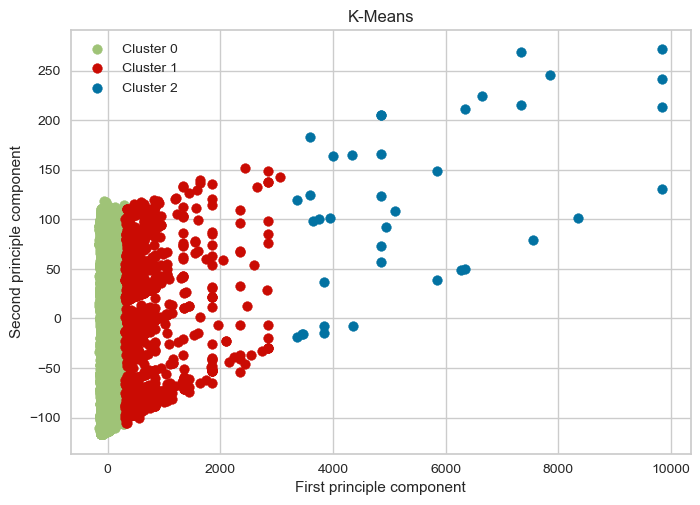

In [ ]:
cluster_colors = ['g', 'r', 'b']
for cluster_id, c in zip(range(4), cluster_colors):
    data = pca_data[y_pred == cluster_id]
    plt.scatter(data[:, 0], data[:, 1], c=c, label=f'Cluster {cluster_id}')

plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('K-Means')
plt.legend()
plt.show()

Polynomial Regression

In [ ]:
# Define a range of degree values to try
degrees = [1, 2, 3, 4, 5]

# Initialize lists to store MSE and R2 scores for each degree
mse_list = []
r2_list = []

# Loop through each degree value
for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('lin_reg', LinearRegression())
    ])

    # Fit the polynomial regression model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

    print(f"Degree {degree}: MSE={mse}, R2={r2}")

Degree 1: MSE=0.0480779603200171, R2=0.46901307742608667
Degree 2: MSE=0.04178479169319213, R2=0.5385166549521331
Degree 3: MSE=0.04004277101550267, R2=0.5577560360021925
Degree 4: MSE=0.05864673460974519, R2=0.3522884722613263
Degree 5: MSE=1.5547538116730872, R2=-16.171151528169915


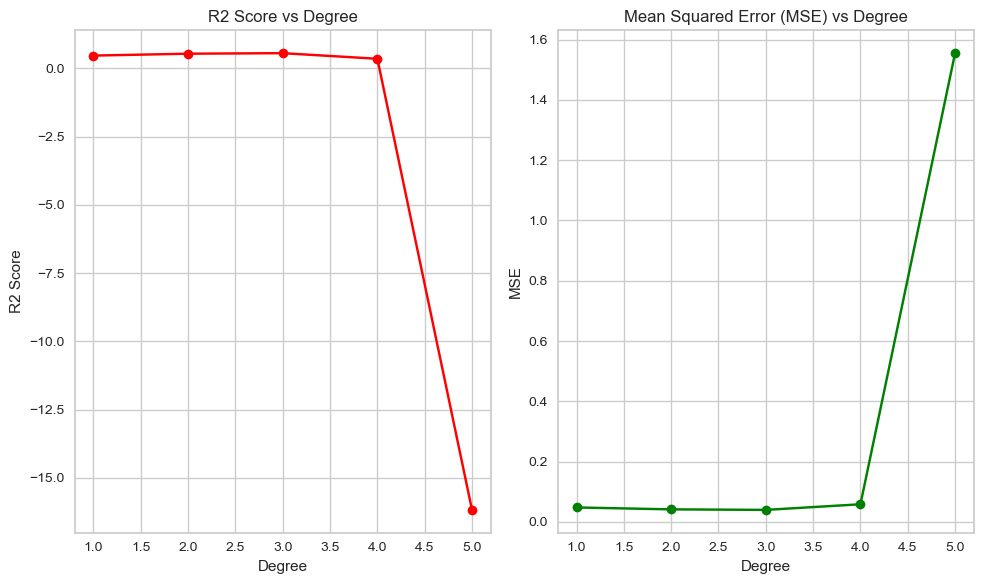

In [ ]:
# Plotting R2 score and MSE versus degrees
plt.figure(figsize=(10, 6))

# Plot R2 score
plt.subplot(1, 2, 1)
plt.plot(degrees, r2_list, marker='o', color='red')
plt.title('R2 Score vs Degree')
plt.xlabel('Degree')
plt.ylabel('R2 Score')

# Plot MSE
plt.subplot(1, 2, 2)
plt.plot(degrees, mse_list, marker='o', color='green')
plt.title('Mean Squared Error (MSE) vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Decision Tree

In [ ]:
# Training the Decision Tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree_reg.predict(X_test)

# Calculating mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Mean Squared Error (MSE): 0.06992419322187371
R2 Score: 0.22773695212506873


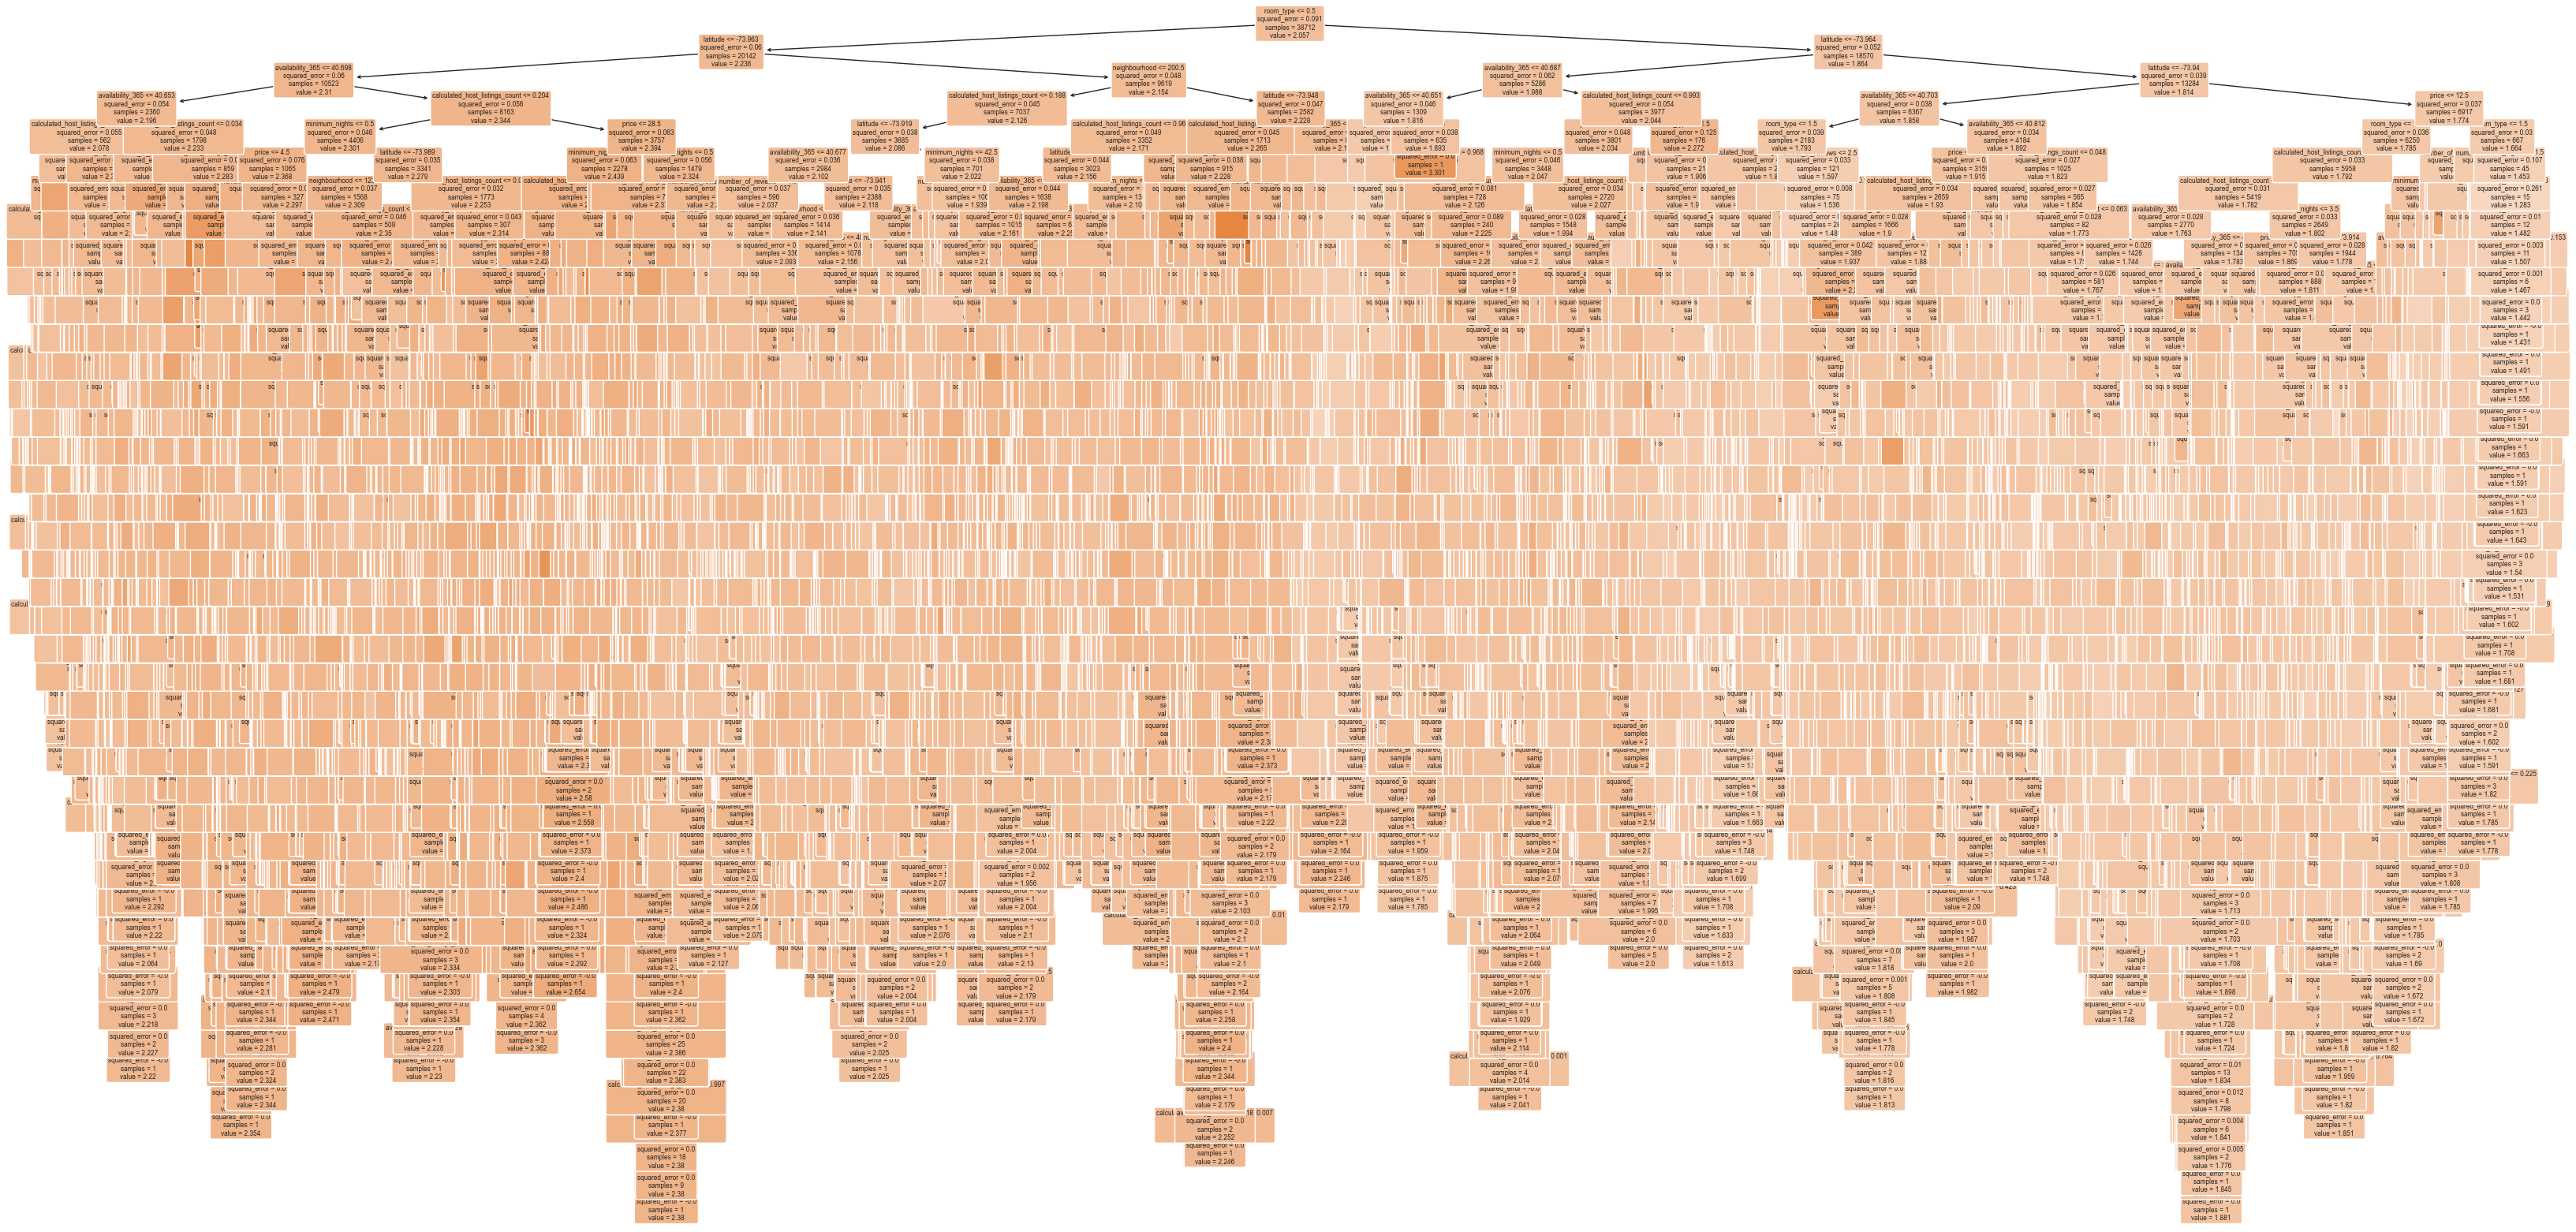

In [ ]:
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(tree_reg, feature_names=numeric_df.columns.tolist(),
                   filled=True, fontsize=6, rounded=True)
plt.show()

In [ ]:
# Define a range of max_depth values to try
max_depth_values = range(1, 21)

# Initialize lists to store mean R2 scores, mean MSE, and standard deviations for each max_depth
mean_r2_scores = []
mean_mse_scores = []
std_r2_scores = []
std_mse_scores = []

# Loop through each max_depth value and perform cross-validation
for max_depth in max_depth_values:
    # Initialize DecisionTreeRegressor with the current max_depth
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Perform cross-validation with 5 folds for R2 score
    r2_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

    # Perform cross-validation with 5 folds for MSE
    mse_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

    # Store mean and standard deviation of R2 scores
    mean_r2_scores.append(np.mean(r2_scores))
    std_r2_scores.append(np.std(r2_scores))

    # Store mean and standard deviation of MSE scores
    mean_mse_scores.append(np.mean(mse_scores))
    std_mse_scores.append(np.std(mse_scores))

# Find the best max_depth based on the maximum mean R2 score
best_max_depth_r2 = max_depth_values[np.argmax(mean_r2_scores)]
print("Best max_depth for R2 score:", best_max_depth_r2)

# Find the best max_depth based on the minimum mean MSE score
best_max_depth_mse = max_depth_values[np.argmin(mean_mse_scores)]
print("Best max_depth for MSE:", best_max_depth_mse)

Best max_depth for R2 score: 7
Best max_depth for MSE: 7


In [ ]:
selected_max_depth = 7 # For example, select max_depth = 5

# Find the index of the selected max_depth in the list of max_depth_values
index = max_depth_values.index(selected_max_depth)

# Print R2 score and MSE for the selected max_depth
print(f"R2 Score for max_depth={selected_max_depth}: {mean_r2_scores[index]} ± {std_r2_scores[index]}")
print(f"MSE for max_depth={selected_max_depth}: {mean_mse_scores[index]} ± {std_mse_scores[index]}")


R2 Score for max_depth=7: 0.5181938455383042 ± 0.03250104791203582
MSE for max_depth=7: 0.043141936752193785 ± 0.004809009977005775


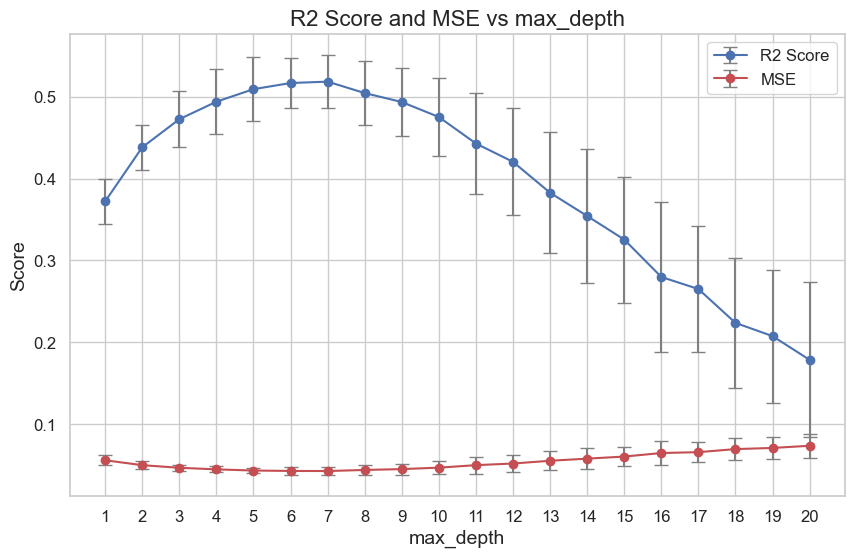

In [ ]:
# Plotting R2 scores and MSE versus max_depth
plt.figure(figsize=(10, 6))

# Plot R2 scores
plt.errorbar(max_depth_values, mean_r2_scores, yerr=std_r2_scores, fmt='-o', color='b', ecolor='gray', capsize=5, label='R2 Score')
plt.xlabel('max_depth', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('R2 Score and MSE vs max_depth', fontsize=16)
plt.xticks(max_depth_values, fontsize=12)
plt.yticks(fontsize=12)

# Plot MSE
plt.errorbar(max_depth_values, mean_mse_scores, yerr=std_mse_scores, fmt='-o', color='r', ecolor='gray', capsize=5, label='MSE')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Random Forest

In [ ]:
# Training the Random Forest regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = forest_reg.predict(X_test)

# Calculating mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 0.03627087037581972
R2 Score: 0.5994139994346794


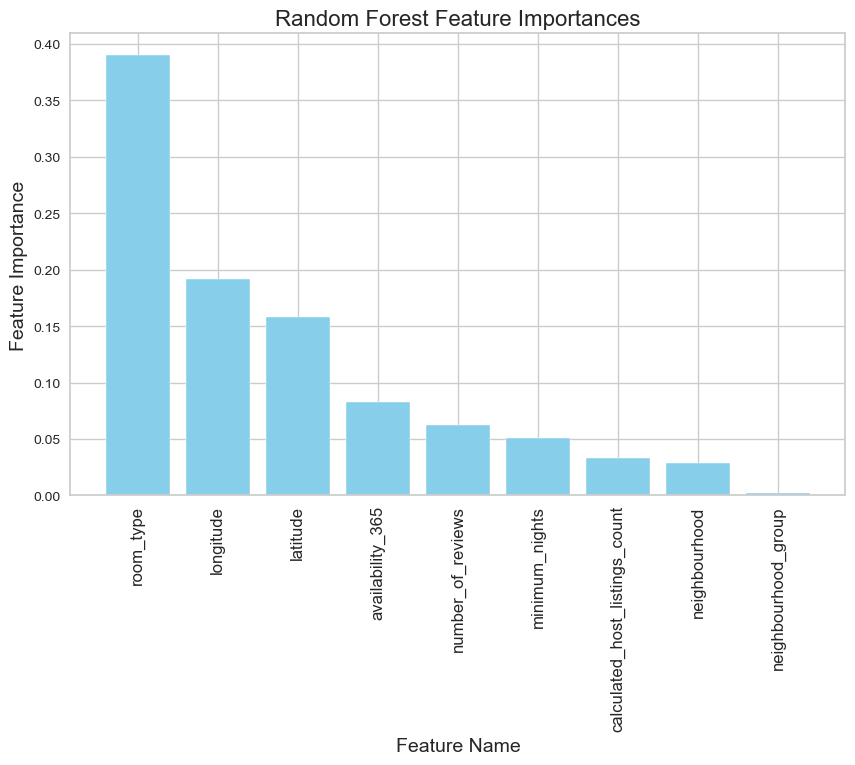

In [ ]:
# Plotting feature importances with feature names
plt.figure(figsize=(10, 6))
importances = forest_reg.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]
plt.bar(range(X_train.shape[1]), importances[indices], color='skyblue', align='center')
plt.xticks(range(X_train.shape[1]), feature_names, fontsize=12, rotation=90)
plt.xlabel('Feature Name', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)
plt.title('Random Forest Feature Importances', fontsize=16)
plt.show()

C:\Users\thufa\AppData\Local\Temp\ipykernel_20100\322905616.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, color='skyblue', shade=True)


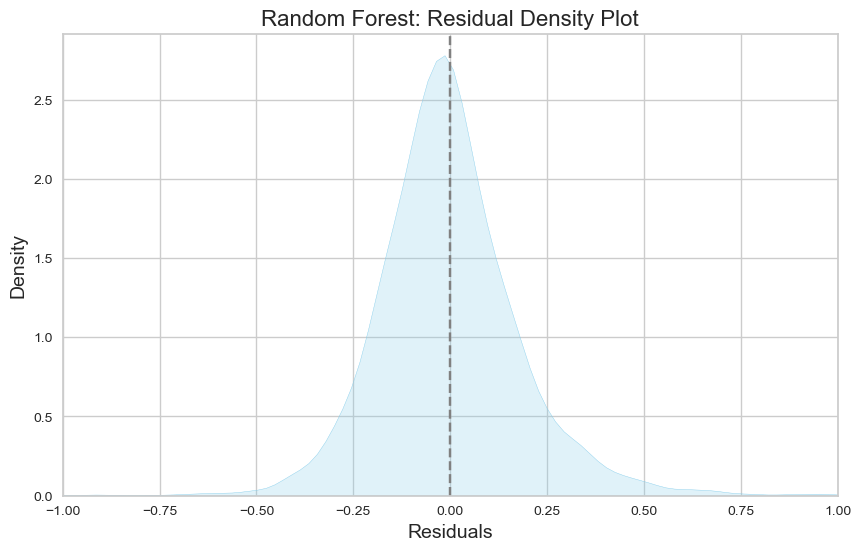

In [ ]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residual density
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='skyblue', shade=True)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Random Forest: Residual Density Plot', fontsize=16)
plt.axvline(x=0, color='gray', linestyle='--')  # Adding a vertical line at x=0
plt.xlim(-1, 1)  # Set x-axis limits from -1 to 1
plt.show()


Ridge Regression

In [ ]:
# Define alpha values
alphas = [0.1, 0.5, 1.0 , 3.0]

# Initialize lists to store R2 scores for each alpha value
alpha_r2_scores = []

# Loop through each alpha value
for alpha in alphas:
    # Initialize Ridge Regression model with the current alpha value
    ridge = Ridge(alpha=alpha)

    # Perform cross-validation with 5 folds
    r2_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

    # Store mean R2 score for the current alpha value
    alpha_r2_scores.append(np.mean(r2_scores))

# Find the best alpha value based on the maximum R2 score
best_alpha_index = np.argmax(alpha_r2_scores)
best_alpha = alphas[best_alpha_index]
best_r2_score = alpha_r2_scores[best_alpha_index]
print("Best Alpha:", best_alpha)
print("R2 Score for Best Alpha:", best_r2_score)


Best Alpha: 0.1
R2 Score for Best Alpha: 0.4749476821838302


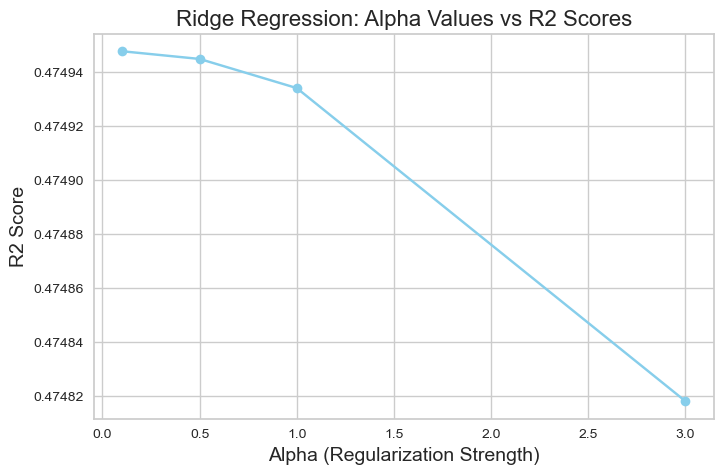

In [ ]:
# Plotting alpha values vs R2 scores
plt.figure(figsize=(8, 5))
plt.plot(alphas, alpha_r2_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Alpha (Regularization Strength)', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.title('Ridge Regression: Alpha Values vs R2 Scores', fontsize=16)
plt.grid(True)
plt.show()

PHASE 3

In [ ]:
import pickle
def save_model(model,filename):
	pickle.dump(model, open(filename, 'wb'))

In [ ]:
save_model(forest_reg, "/content/dic-phase3_RF.pickle")